<a href="https://colab.research.google.com/github/chandradprakoso/23001057-16-cdp-hatespeechdetectionapi-gold/blob/main/Computational_Drug_Discovery_Breast_Cancer_%5BChemBL%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection and Pre-Processing from the ChEMBL**

## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.

## **Install ChEMBL Client**

In [1]:
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00


###Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Search for target protein

### Target search for breast cancer

In [3]:
# Target search for breast cancer related target
target = new_client.target
target_query = target.search('breast cancer')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Canis lupus familiaris,ABC-type xenobiotic transporter,29.0,False,CHEMBL4739687,"[{'accession': 'Q38JL0', 'component_descriptio...",SINGLE PROTEIN,9615.0
1,"[{'xref_id': 'P38398', 'xref_name': None, 'xre...",Homo sapiens,Breast cancer type 1 susceptibility protein,25.0,False,CHEMBL5990,"[{'accession': 'P38398', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Homo sapiens,Breast cancer cell line,22.0,False,CHEMBL614788,[],CELL-LINE,9606.0
3,"[{'xref_id': 'Q7RTN6', 'xref_name': None, 'xre...",Homo sapiens,STE20-related kinase adapter protein alpha,19.0,False,CHEMBL1795198,"[{'accession': 'Q7RTN6', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Homo sapiens,Kinesin-like protein KIF15,19.0,False,CHEMBL3632454,"[{'accession': 'Q9NS87', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
100,[],Homo sapiens,Aurora kinase A/B,3.0,False,CHEMBL3883303,"[{'accession': 'Q96GD4', 'component_descriptio...",PROTEIN FAMILY,9606.0
101,[],Homo sapiens,Speckle-type POZ protein/PTEN,3.0,False,CHEMBL4523606,"[{'accession': 'P60484', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
102,[],Homo sapiens,26S proteasome,1.0,False,CHEMBL2364701,"[{'accession': 'Q99460', 'component_descriptio...",PROTEIN COMPLEX,9606.0
103,[],Homo sapiens,Mitochondrial complex I (NADH dehydrogenase),0.0,False,CHEMBL2363065,"[{'accession': 'P03923', 'component_descriptio...",PROTEIN COMPLEX,9606.0


### Select and retrieve bioactivity data for  "Breast cancer type 1 susceptibility protein" (second entry)

We will assign the second entry as a selected_target

In [4]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL5990'

Here, we will retrieve protein target that have IC50 activities to selected_target

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,6222842,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,4.6
1,None,None,6222843,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,250.0
2,None,None,6222844,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,52.8
3,None,None,6222845,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,250.0
4,None,None,6222846,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,15.0
5,None,None,6222847,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,35.0
6,None,None,6222848,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,3.2
7,None,None,6222849,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,30.1
8,None,None,6222850,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,7.1
9,None,None,6222851,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,18.4


Here, we got the result in dataframe that shows 19 entries as dataset to be procced in the next step

In [7]:
#check list of columns
df.columns.tolist()

['action_type',
 'activity_comment',
 'activity_id',
 'activity_properties',
 'assay_chembl_id',
 'assay_description',
 'assay_type',
 'assay_variant_accession',
 'assay_variant_mutation',
 'bao_endpoint',
 'bao_format',
 'bao_label',
 'canonical_smiles',
 'data_validity_comment',
 'data_validity_description',
 'document_chembl_id',
 'document_journal',
 'document_year',
 'ligand_efficiency',
 'molecule_chembl_id',
 'molecule_pref_name',
 'parent_molecule_chembl_id',
 'pchembl_value',
 'potential_duplicate',
 'qudt_units',
 'record_id',
 'relation',
 'src_id',
 'standard_flag',
 'standard_relation',
 'standard_text_value',
 'standard_type',
 'standard_units',
 'standard_upper_value',
 'standard_value',
 'target_chembl_id',
 'target_organism',
 'target_pref_name',
 'target_tax_id',
 'text_value',
 'toid',
 'type',
 'units',
 'uo_units',
 'upper_value',
 'value']

In [8]:
#save dataframe as csv
df.to_csv('CHEMBL5990_01_rawdata.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

Here, we want to check and drop the field data that are not unique

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,6222842,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,4.6
1,None,None,6222843,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,250.0
2,None,None,6222844,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,52.8
3,None,None,6222845,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,250.0
4,None,None,6222846,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,15.0
5,None,None,6222847,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,35.0
6,None,None,6222848,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,3.2
7,None,None,6222849,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,30.1
8,None,None,6222850,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,7.1
9,None,None,6222851,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,None,None,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,None,None,IC50,uM,UO_0000065,None,18.4


All the data are unique, so there is no change in the dataframe

In [10]:
df2.shape

(19, 46)

In [11]:
len(df2.canonical_smiles.unique())

19

## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1784774,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,4600.0
1,CHEMBL1784771,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,250000.0
2,CHEMBL1784772,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,52800.0
3,CHEMBL1784773,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,250000.0
4,CHEMBL1784704,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,15000.0


In [13]:
df3.to_csv('CHEMBL5990_02_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

Here, we want to separates the entries into 3 class categories based on the their own standard_value

In [14]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

Now, we add 'class' column into df3 to make a new dataframe df4

In [15]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1784774,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,4600.0,intermediate
1,CHEMBL1784771,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,250000.0,inactive
2,CHEMBL1784772,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,52800.0,inactive
3,CHEMBL1784773,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,250000.0,inactive
4,CHEMBL1784704,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,15000.0,inactive


In [16]:
df4.to_csv('CHEMBL5990_03_curated.csv', index=False)

# Descriptor Calculation and Exploratory Data Analysis

Here, we clean the field 'canonical_smiles' data to ensure the consistency of data

In [17]:
df_no_smiles = df4.drop(columns='canonical_smiles')

In [18]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [19]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL1784774,4600.0,intermediate,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...
1,CHEMBL1784771,250000.0,inactive,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...
2,CHEMBL1784772,52800.0,inactive,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...
3,CHEMBL1784773,250000.0,inactive,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...
4,CHEMBL1784704,15000.0,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...
5,CHEMBL1784770,35000.0,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...
6,CHEMBL1784703,3200.0,intermediate,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...
7,CHEMBL1784775,30100.0,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...
8,CHEMBL1784776,7100.0,intermediate,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...
9,CHEMBL1784777,18400.0,inactive,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...


In [20]:
df_clean_smiles.shape

(19, 4)

## **Install rdkit**

In [21]:
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 25.7 MB/s eta 0:00:00


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### Import Libraries

In [22]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [23]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [24]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,571.524,-2.3302,7.0,8.0
1,533.582,-1.5747,6.0,7.0
2,577.591,-2.2640,7.0,8.0
3,585.551,-1.9417,7.0,8.0
4,545.486,-2.8165,8.0,8.0


In [25]:
df_lipinski.shape

(19, 4)

### **Combine DataFrames**

Now, we combine our df4 and df_lipinski to make a new dataframe df_combined

In [26]:
df_combined = pd.concat([df4,df_lipinski], axis=1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1784774,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,4600.0,intermediate,571.524,-2.3302,7.0,8.0
1,CHEMBL1784771,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,250000.0,inactive,533.582,-1.5747,6.0,7.0
2,CHEMBL1784772,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,52800.0,inactive,577.591,-2.2640,7.0,8.0
3,CHEMBL1784773,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,250000.0,inactive,585.551,-1.9417,7.0,8.0
4,CHEMBL1784704,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,15000.0,inactive,545.486,-2.8165,8.0,8.0


In [27]:
df_combined.shape

(19, 8)

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [28]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [29]:
df_combined.standard_value.describe()

count           19
unique          16
top       250000.0
freq             4
Name: standard_value, dtype: object

In [30]:
def norm_value(input):
    norm = []

    for value in input['standard_value']:
        try:
            numeric_value = float(value)
            if numeric_value > 100000000:
                numeric_value = 100000000
            norm.append(numeric_value)
        except ValueError:
            print(f"Could not convert '{value}' to a number")

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x


We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [31]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1784774,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,intermediate,571.524,-2.3302,7.0,8.0,4600.0
1,CHEMBL1784771,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,inactive,533.582,-1.5747,6.0,7.0,250000.0
2,CHEMBL1784772,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,inactive,577.591,-2.2640,7.0,8.0,52800.0
3,CHEMBL1784773,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,inactive,585.551,-1.9417,7.0,8.0,250000.0
4,CHEMBL1784704,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,inactive,545.486,-2.8165,8.0,8.0,15000.0
5,CHEMBL1784770,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,541.498,-1.6911,6.0,7.0,35000.0
6,CHEMBL1784703,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,intermediate,569.552,-1.0550,6.0,7.0,3200.0
7,CHEMBL1784775,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,557.497,-2.7187,7.0,8.0,30100.0
8,CHEMBL1784776,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...,intermediate,583.579,-0.6649,6.0,7.0,7100.0
9,CHEMBL1784777,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,583.579,-0.6649,6.0,7.0,18400.0


In [32]:
df_norm.standard_value_norm.describe()

count        19.000000
mean      78015.789474
std       99927.853214
min        1000.000000
25%        8950.000000
50%       18400.000000
75%      135050.000000
max      250000.000000
Name: standard_value_norm, dtype: float64

In [33]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1784774,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,intermediate,571.524,-2.3302,7.0,8.0,5.337242
1,CHEMBL1784771,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,inactive,533.582,-1.5747,6.0,7.0,3.602060
2,CHEMBL1784772,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,inactive,577.591,-2.2640,7.0,8.0,4.277366
3,CHEMBL1784773,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,inactive,585.551,-1.9417,7.0,8.0,3.602060
4,CHEMBL1784704,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,inactive,545.486,-2.8165,8.0,8.0,4.823909
5,CHEMBL1784770,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,541.498,-1.6911,6.0,7.0,4.455932
6,CHEMBL1784703,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,intermediate,569.552,-1.0550,6.0,7.0,5.494850
7,CHEMBL1784775,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,557.497,-2.7187,7.0,8.0,4.521434
8,CHEMBL1784776,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...,intermediate,583.579,-0.6649,6.0,7.0,5.148742
9,CHEMBL1784777,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,583.579,-0.6649,6.0,7.0,4.735182


In [34]:
df_final.pIC50.describe()

count    19.000000
mean      4.595601
std       0.762873
min       3.602060
25%       3.886117
50%       4.735182
75%       5.057659
max       6.000000
Name: pIC50, dtype: float64

In [35]:
df_final.to_csv('CHEMBL5990_04_3class_pIC50.csv', index=False)

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [36]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL1784771,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,inactive,533.582,-1.5747,6.0,7.0,3.602060
2,CHEMBL1784772,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,inactive,577.591,-2.2640,7.0,8.0,4.277366
3,CHEMBL1784773,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,inactive,585.551,-1.9417,7.0,8.0,3.602060
4,CHEMBL1784704,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,inactive,545.486,-2.8165,8.0,8.0,4.823909
5,CHEMBL1784770,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,541.498,-1.6911,6.0,7.0,4.455932
7,CHEMBL1784775,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,557.497,-2.7187,7.0,8.0,4.521434
9,CHEMBL1784777,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,583.579,-0.6649,6.0,7.0,4.735182
10,CHEMBL2369531,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,621.584,-1.1770,7.0,8.0,4.752027
11,CHEMBL2369532,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,621.584,-1.1770,7.0,8.0,3.765230
12,CHEMBL1784779,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,587.523,-2.6246,8.0,9.0,4.826814


In [37]:
df_2class.shape

(15, 8)

In [38]:
df_2class.to_csv('CHEMBL5990_05_2class_pIC50.csv', index=False)

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [39]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

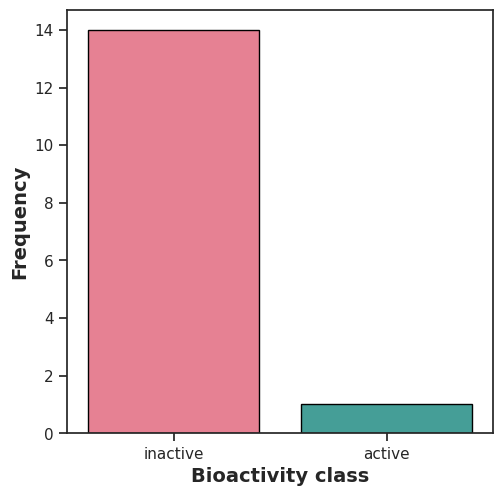

In [40]:
plt.figure(figsize=(5.5, 5.5))

palette = sns.color_palette("husl", 2)

sns.countplot(x='class', hue='class', data=df_2class, edgecolor='black', palette=palette, legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

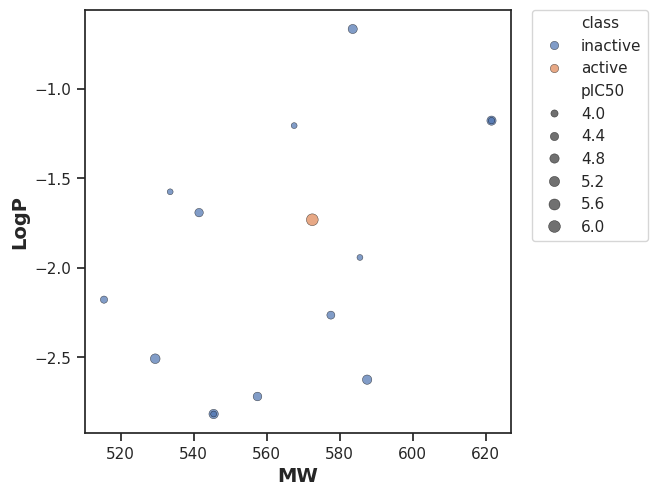

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [42]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

### **Box plots**

#### **pIC50 value**

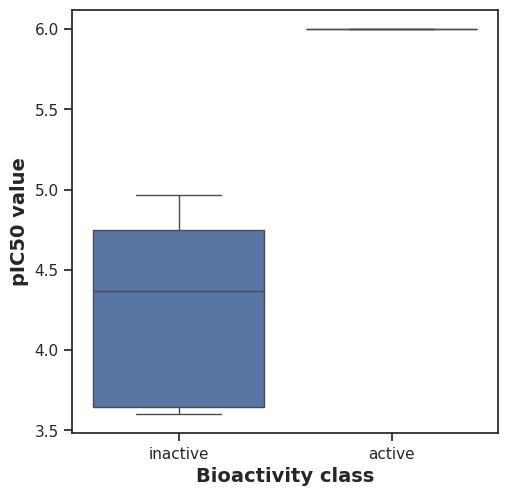

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [44]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,14.0,0.128996,0.05,Same distribution (fail to reject H0)


#### **MW**

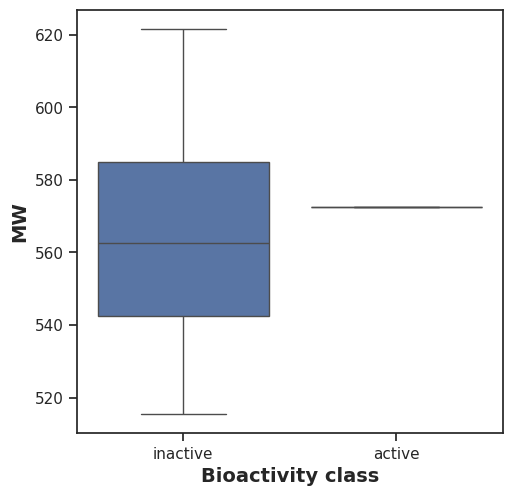

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [46]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,8.0,0.907786,0.05,Same distribution (fail to reject H0)


#### **LogP**

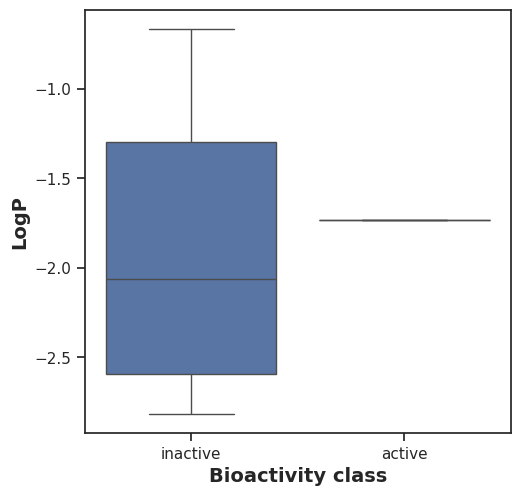

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [48]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,8.0,0.907786,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

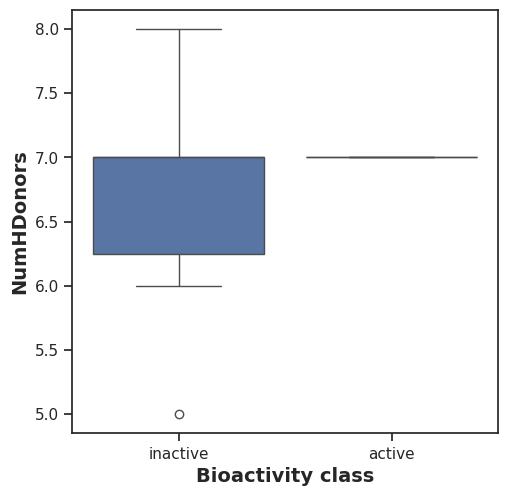

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [50]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,7.5,1.0,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

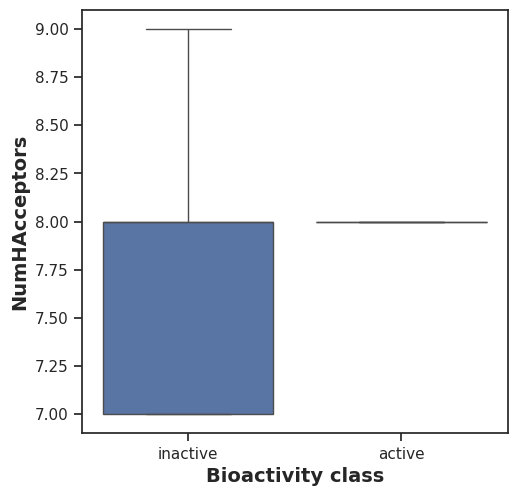

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [52]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,9.0,0.6885,0.05,Same distribution (fail to reject H0)


# **Calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset**

In [53]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-05-10 06:12:54--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-05-10 06:12:54--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   126MB/s    in 0.2s    

2024-05-10 06:12:54 (126 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-05-10 06:12:54--  https://github

In [54]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [55]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1784774,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,intermediate,571.524,-2.3302,7.0,8.0,5.337242
1,CHEMBL1784771,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,inactive,533.582,-1.5747,6.0,7.0,3.602060
2,CHEMBL1784772,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,inactive,577.591,-2.2640,7.0,8.0,4.277366
3,CHEMBL1784773,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,inactive,585.551,-1.9417,7.0,8.0,3.602060
4,CHEMBL1784704,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,inactive,545.486,-2.8165,8.0,8.0,4.823909
5,CHEMBL1784770,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,541.498,-1.6911,6.0,7.0,4.455932
6,CHEMBL1784703,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,intermediate,569.552,-1.0550,6.0,7.0,5.494850
7,CHEMBL1784775,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,557.497,-2.7187,7.0,8.0,4.521434
8,CHEMBL1784776,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...,intermediate,583.579,-0.6649,6.0,7.0,5.148742
9,CHEMBL1784777,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,inactive,583.579,-0.6649,6.0,7.0,4.735182


In [56]:
selection = ['canonical_smiles','molecule_chembl_id']
df_final_selection = df_final[selection]
df_final_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)
df_final_selection.head()

,canonical_smiles,molecule_chembl_id
0,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O...,CHEMBL1784774
1,CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[...,CHEMBL1784771
2,CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]...,CHEMBL1784772
3,CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)...,CHEMBL1784773
4,CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)...,CHEMBL1784704


In [57]:
! cat molecule.smi | head -5

CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(N)=O)[C@@H](C)O	CHEMBL1784774
CC(=O)N[C@@H](CCC(=O)O)C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(N)=O)[C@@H](C)O	CHEMBL1784771
CC(=O)N[C@@H](CC(C(=O)O)C(=O)O)C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(N)=O)[C@@H](C)O	CHEMBL1784772
CC(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(N)=O)[C@@H](C)O)[C@@H](C)OP(=O)(O)O	CHEMBL1784773
CC(=O)N[C@@H](COP(=O)(O)O)C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(N)=O)[C@@H](C)O	CHEMBL1784704


## **Calculate fingerprint descriptors**


In [58]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [59]:
! bash padel.sh

Processing CHEMBL1784774 in molecul.smi (1/19). 
Processing CHEMBL1784771 in molecul.smi (2/19). 
Processing CHEMBL1784772 in molecul.smi (3/19). Average speed: 4.33 s/mol.
Processing CHEMBL1784773 in molecul.smi (4/19). Average speed: 2.28 s/mol.
Processing CHEMBL1784704 in molecul.smi (5/19). Average speed: 3.45 s/mol.
Processing CHEMBL1784770 in molecul.smi (6/19). Average speed: 2.32 s/mol.
Processing CHEMBL1784775 in molecul.smi (8/19). Average speed: 1.40 s/mol.
Processing CHEMBL1784703 in molecul.smi (7/19). Average speed: 1.65 s/mol.
Processing CHEMBL1784776 in molecul.smi (9/19). Average speed: 1.34 s/mol.
Processing CHEMBL1784777 in molecul.smi (10/19). Average speed: 1.18 s/mol.
Processing CHEMBL2369531 in molecul.smi (11/19). Average speed: 1.20 s/mol.
Processing CHEMBL2369532 in molecul.smi (12/19). Average speed: 1.09 s/mol.
Processing CHEMBL1784780 in molecul.smi (14/19). Average speed: 1.05 s/mol.
Processing CHEMBL1784779 in molecul.smi (13/19). Average speed: 1.13 s/mo

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [60]:
df_X = pd.read_csv('descriptors_output.csv')
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1784774,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1784771,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1784773,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1784772,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1784704,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CHEMBL1784770,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHEMBL1784775,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CHEMBL1784703,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CHEMBL1784777,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,CHEMBL1784776,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [62]:
df_y = df_final[['pIC50']]
df_y

,pIC50
0,5.337242
1,3.602060
2,4.277366
3,3.602060
4,4.823909
5,4.455932
6,5.494850
7,4.521434
8,5.148742
9,4.735182


## **Combining X and Y variable**

In [63]:
dataset = pd.concat([df_X,df_y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.337242
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.277366
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.823909
5,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.455932
6,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.494850
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.521434
8,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148742
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.735182


In [64]:
dataset.to_csv('CHEMBL5990_06_dataset_3class_pIC50.csv', index=False)

# **Building a regression model of acetylcholinesterase inhibitors using the random forest algorithm**

## **Import libraries**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [66]:
X = df_X
y = df_y

### **Remove low variance features**

In [68]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X

array([[0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]])

In [69]:
X.shape

(19, 11)

## **Data split (80/20 ratio)**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
X_train.shape, y_train.shape

((15, 11), (15, 1))

## **Building Regression Model using Random Forest**

In [72]:
model = RandomForestRegressor(n_estimators=100)
np.random.seed(100)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
r2

<ipython-input-72-542843e3bbe2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


-0.7541538384397237

In [73]:
y_pred = model.predict(X_test)
y_pred

array([5.17617846, 4.62162976, 4.52945476, 4.44421113])

In [74]:
print(len(y_test), len(y_pred))


4 4


## **Scatter Plot of Experimental vs Predicted pIC50 Values**

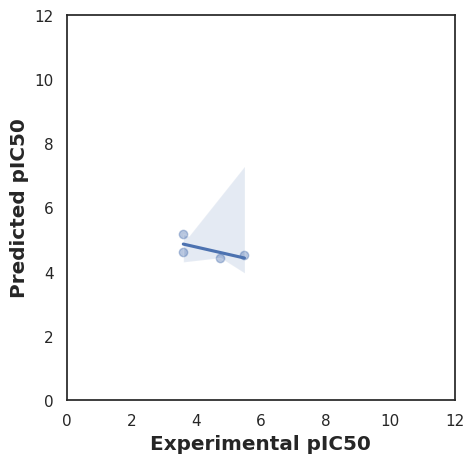

In [75]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np


# Initialize the KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your model (e.g., Logistic Regression)
model = RandomForestRegressor(n_estimators=100)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Print the results
print("Cross-validation scores:", cv_results)
print("Average MSE:", np.mean(cv_results))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross-validation scores: [-1.14622099 -0.72707471 -1.52790036 -0.60856295 -0.61893676]
Average MSE: -0.9257391522956822


# **Comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors**

## Install **lazypredict**

In [77]:
! pip install lazypredict

## **Import libraries**

In [78]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **Compare ML algorithms**

In [79]:
reg = LazyRegressor(verbose=1,ignore_warnings=True, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 17%|█▋        | 7/42 [00:00<00:01, 33.48it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -1.595498318244113, 'Adjusted R-Squared': 1.9733118693415423, 'RMSE': 1.2964953271165913, 'Time taken': 0.03364205360412598}
{'Model': 'BaggingRegressor', 'R-Squared': -0.8258352770051935, 'Adjusted R-Squared': 1.6846882288769476, 'RMSE': 1.0874051282373147, 'Time taken': 0.03910326957702637}
{'Model': 'BayesianRidge', 'R-Squared': -0.18872636552833932, 'Adjusted R-Squared': 1.4457723870731272, 'RMSE': 0.8774078740783309, 'Time taken': 0.03129911422729492}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.4161153288838704, 'Adjusted R-Squared': 1.5310432483314513, 'RMSE': 0.957656789073447, 'Time taken': 0.013996124267578125}
{'Model': 'DummyRegressor', 'R-Squared': -0.1343273565684031, 'Adjusted R-Squared': 1.4253727587131513, 'RMSE': 0.8570966209805241, 'Time taken': 0.011908292770385742}
{'Model': 'ElasticNet', 'R-Squared': -0.1343273565684031, 'Adjusted R-Squared': 1.4253727587131513, 'RMSE': 0.8570966209805241, 'Time taken': 0.013314962

 26%|██▌       | 11/42 [00:00<00:01, 17.34it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.5338481280117318, 'Adjusted R-Squared': 1.5751930480043994, 'RMSE': 0.9966708585848577, 'Time taken': 0.13454794883728027}
{'Model': 'GammaRegressor', 'R-Squared': -0.5107012670966706, 'Adjusted R-Squared': 1.5665129751612514, 'RMSE': 0.9891220344137699, 'Time taken': 0.1711742877960205}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -14.785468877386492, 'Adjusted R-Squared': 6.919550829019935, 'RMSE': 3.197343696907626, 'Time taken': 0.02616405487060547}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.6695340561662888, 'Adjusted R-Squared': 1.6260752710623583, 'RMSE': 1.0398201309657071, 'Time taken': 0.13661599159240723}


 45%|████▌     | 19/42 [00:01<00:01, 17.50it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.1343273565684031, 'Adjusted R-Squared': 1.4253727587131513, 'RMSE': 0.8570966209805241, 'Time taken': 0.23154425621032715}
{'Model': 'HuberRegressor', 'R-Squared': -0.742279700505377, 'Adjusted R-Squared': 1.6533548876895163, 'RMSE': 1.0622323368227435, 'Time taken': 0.03427529335021973}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.4394910919296331, 'Adjusted R-Squared': 1.5398091594736125, 'RMSE': 0.9655284402624063, 'Time taken': 0.020111799240112305}
{'Model': 'KernelRidge', 'R-Squared': -28.311167808638594, 'Adjusted R-Squared': 11.991687928239472, 'RMSE': 4.356895472896596, 'Time taken': 0.0238187313079834}
{'Model': 'Lars', 'R-Squared': -0.4117962503800814, 'Adjusted R-Squared': 1.5294235938925305, 'RMSE': 0.9561952719988849, 'Time taken': 0.02009892463684082}
{'Model': 'LarsCV', 'R-Squared': -0.1343273565684031, 'Adjusted R-Squared': 1.4253727587131513, 'RMSE': 0.8570966209805241, 'Time taken': 0.02809286117553711}
{

 62%|██████▏   | 26/42 [00:01<00:00, 22.53it/s]

{'Model': 'LassoCV', 'R-Squared': -0.1343273565684031, 'Adjusted R-Squared': 1.4253727587131513, 'RMSE': 0.8570966209805241, 'Time taken': 0.059835195541381836}
{'Model': 'LassoLars', 'R-Squared': -0.1343273565684031, 'Adjusted R-Squared': 1.4253727587131513, 'RMSE': 0.8570966209805241, 'Time taken': 0.014551162719726562}
{'Model': 'LassoLarsCV', 'R-Squared': -0.1343273565684031, 'Adjusted R-Squared': 1.4253727587131513, 'RMSE': 0.8570966209805241, 'Time taken': 0.020374059677124023}
{'Model': 'LassoLarsIC', 'R-Squared': -0.1343273565684031, 'Adjusted R-Squared': 1.4253727587131513, 'RMSE': 0.8570966209805241, 'Time taken': 0.026927947998046875}
{'Model': 'LinearRegression', 'R-Squared': -0.2504293422144117, 'Adjusted R-Squared': 1.4689110033304043, 'RMSE': 0.8998915172152804, 'Time taken': 0.020429134368896484}
{'Model': 'LinearSVR', 'R-Squared': 0.6000449963103627, 'Adjusted R-Squared': 1.149983126383614, 'RMSE': 0.5089394863154432, 'Time taken': 0.012264490127563477}
{'Model': 'MLPR

 79%|███████▊  | 33/42 [00:01<00:00, 26.40it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.5387135110862193, 'Adjusted R-Squared': 1.5770175666573323, 'RMSE': 0.9982503324933513, 'Time taken': 0.019871950149536133}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.024890398128226465, 'Adjusted R-Squared': 1.384333899298085, 'RMSE': 0.8147029560367229, 'Time taken': 0.013928651809692383}
{'Model': 'PoissonRegressor', 'R-Squared': -0.48461611456797127, 'Adjusted R-Squared': 1.5567310429629893, 'RMSE': 0.9805453060324685, 'Time taken': 0.01483774185180664}
{'Model': 'RANSACRegressor', 'R-Squared': -2.3695673434483404, 'Adjusted R-Squared': 2.2635877537931277, 'RMSE': 1.4772284057827825, 'Time taken': 0.12975502014160156}


 88%|████████▊ | 37/42 [00:01<00:00, 24.64it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.7328904191294379, 'Adjusted R-Squared': 1.649833907173539, 'RMSE': 1.0593662436953137, 'Time taken': 0.15199899673461914}
{'Model': 'Ridge', 'R-Squared': -0.3697166639562073, 'Adjusted R-Squared': 1.5136437489835777, 'RMSE': 0.941837437931162, 'Time taken': 0.012116193771362305}
{'Model': 'RidgeCV', 'R-Squared': -0.5355007431827472, 'Adjusted R-Squared': 1.57581277869353, 'RMSE': 0.9972076359644174, 'Time taken': 0.012230634689331055}
{'Model': 'SGDRegressor', 'R-Squared': -0.35883731019616727, 'Adjusted R-Squared': 1.5095639913235628, 'RMSE': 0.9380895787098941, 'Time taken': 0.012299537658691406}
{'Model': 'SVR', 'R-Squared': -0.5477070866667837, 'Adjusted R-Squared': 1.5803901575000439, 'RMSE': 1.001163402203248, 'Time taken': 0.02264404296875}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.2504293422144117, 'Adjusted R-Squared': 1.4689110033304043, 'RMSE': 0.8998915172152804, 'Time taken': 0.03197360038757324}
{'Model': 'T

100%|██████████| 42/42 [00:02<00:00, 19.36it/s]

{'Model': 'XGBRegressor', 'R-Squared': -1.5846728228094387, 'Adjusted R-Squared': 1.9692523085535396, 'RMSE': 1.2937887428912365, 'Time taken': 0.23355555534362793}
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 15, number of used features: 0
[LightGBM] [Info] Start training from score 4.657695
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped

In [80]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,11.99,-28.31,4.36,0.02
GaussianProcessRegressor,6.92,-14.79,3.20,0.03
MLPRegressor,2.73,-3.62,1.73,0.07
RANSACRegressor,2.26,-2.37,1.48,0.13
AdaBoostRegressor,1.97,-1.60,1.30,0.03
XGBRegressor,1.97,-1.58,1.29,0.23
BaggingRegressor,1.68,-0.83,1.09,0.04
HuberRegressor,1.65,-0.74,1.06,0.03
RandomForestRegressor,1.65,-0.73,1.06,0.15


## **Data visualization of model performance**

[(-3.0, 1.0)]

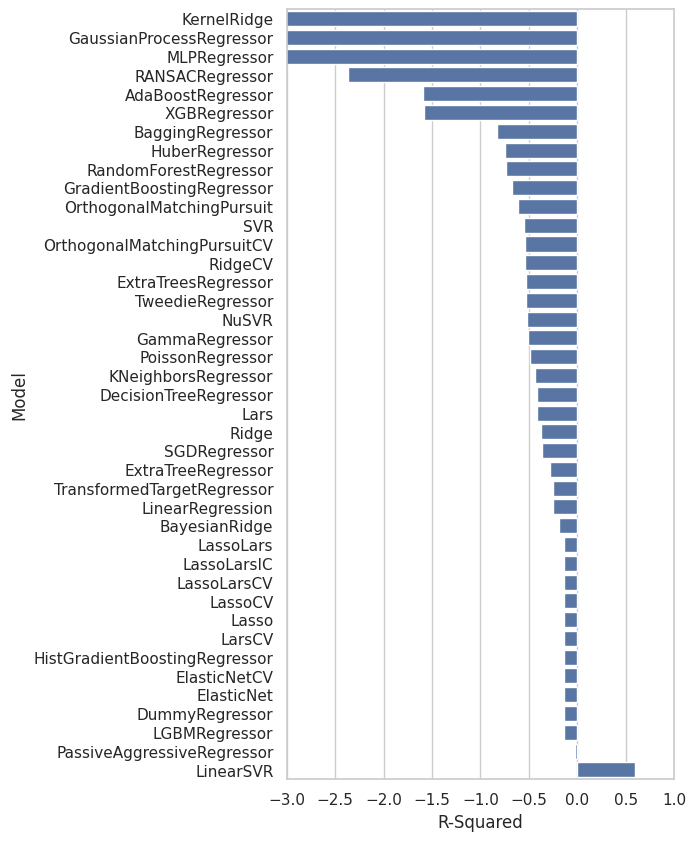

In [81]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(-3, 1))

[(0.0, 10.0)]

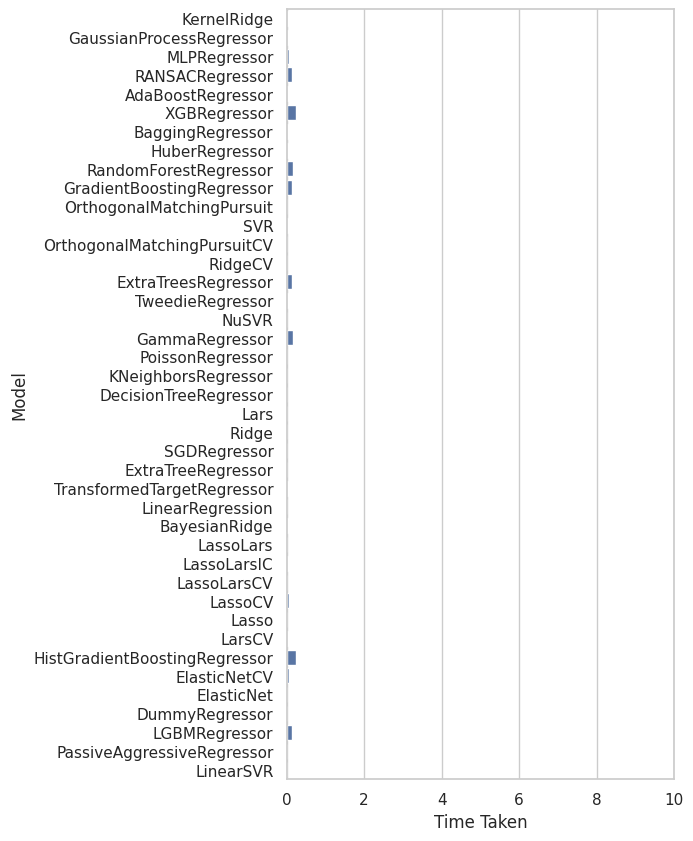

In [82]:
# Bar plot of calculation time

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Time Taken", data=predictions)
ax.set(xlim=(0, 10))

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
